<a href="https://colab.research.google.com/github/kanon18kkk/final_chat1/blob/main/Excercises20231222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **演習１：　階層的クラスタリング**
---
- ランダムな2次元サンプルを生成し、散布図をプロットする。
- 各サンプルに 'a' から 'j' までのラベルを割り当て、ラベルを散布図上に表示しる。
- 階層的クラスタリングによるリンケージ行列を作成し、それを用いてラベル付きの樹形図を生成する。
- デンドログラムのレイアウトと外観をカスタマイズし、特定のクラスタ数（この例ではトップ3つ）を示すための閾値を表示する。
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate random 2D samples
np.random.seed(4)
samples = np.random.rand(10, 2)
# インデックス付きの散布図
fig, ax = plt.subplots()
ax.scatter(samples[:, 0], samples[:, 1])
# サンプルに 'a' から 'j' までのラベルを割り当てる
labels = list('abcdefghij')

# 各点の添え字をプリント
for i in range(len(samples)) :
    ax.annotate(labels[i], (samples[i, 0], samples[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')

# ラベルとタイトルの追加
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('square')
# プロットの表示
plt.show()

In [ ]:
# 階層的クラスタリングによるリンケージ行列の作成
linkage_matrix = linkage(samples, 'ward')

# ラベル付きの樹形図の作成
dendrogram(linkage_matrix, labels=labels)

# ラベル付きのデンドログラムを作成し結果を取得
result = dendrogram(linkage_matrix, labels=labels, orientation='top', leaf_font_size=12)

# レイアウトと外観をカスタマイズ
plt.title('Dendrogram', fontsize=16)
plt.xlabel('Cluster Distance', fontsize=14)
plt.ylabel('Sample Index', fontsize=14)

# プロットを表示
# 閾値・クラスタの数を決める
p = 3
plt.axhline(y=max(result['dcoord'][-p]), color='red', linestyle='--', linewidth=2, label=f'Top {p} Clusters')
plt.show()

# **課題(１)　階層的クラスタリングの考察**
---
- linkage メソッドの引数を変更して、異なる階層的クラスタリング手法を試してください（例: 'single', 'complete', 'average'など）。ウォード法の結果と比較して、その違いを説明してください。
---
### 答えをここに書いてください。


# **演習２： k-meansと階層的クラスタリングの比較**
---
1.  データの作成
- make_blobs 関数を使用して、4つの中心を持つランダムな2Dサンプルデータを生成する。
2.  K-meansクラスタリング:
- K-meansのエルボー法によるクラスタ数決定
- k を変化させながら、各クラスタ数における「クラスタ内平方和（WCSS）」を計算する。
- エルボー法により、WCSSが急激に減少するクラスタ数（適切なクラスタ数）を見つける。
- エルボー法で決定した最適なクラスタ数を使用して、K-meansクラスタリングを実行する。
- 結果を散布図上にプロットし、各クラスタの中心をマーカーで表示する。

3. 階層的クラスタリングとデンドログラム:
- linkage メソッドを使用して、階層的クラスタリングのためのリンケージ行列を作成する。
- リンケージ行列を用いてデンドログラムを描画する。
- 階層的クラスタリングの結果から得られたクラスタラベルを取得し、指定された閾値を用いてクラスタリングを行う。
- クラスタリング結果を散布図上にプロットし、各クラスタを異なる色で表示する。
---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs
# サンプルデータ生成
samples, cluster_labels = make_blobs(n_samples=300, centers=5, random_state=43)

# 結果の可視化
plt.scatter(samples[:,0], samples[:,1], c=cluster_labels, s=20, cmap='viridis')
plt.title('Generated Blob Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

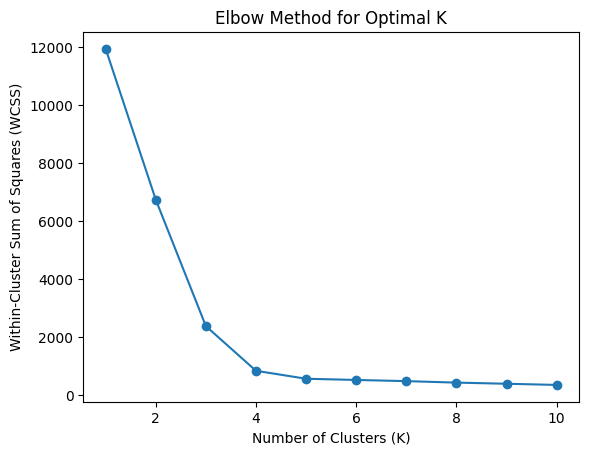

In [ ]:
# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(samples)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
# k-means クラスタリング
kmeans = KMeans(n_clusters=4,n_init='auto')
kmeans.fit(samples)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 結果の可視化
plt.scatter(samples[:,0], samples[:,1], c=labels, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x', s=150, linewidths=5, zorder=10)
plt.show()

In [ ]:
# 階層的クラスタリング
linkage_matrix = linkage(samples, 'ward')

#デンドロブラムを作成し、描画する
dendrogram(linkage_matrix)
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.title('Dendrogram')

plt.show()

In [ ]:
# 階層的クラスタリングからクラスタラベルを取得
from scipy.cluster.hierarchy import fcluster
# クラスタリングのための閾値設定
threshold = 15 # 必要に応じてこの閾値を調整してください

# 距離基準に基づいてクラスタラベルを取得
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# クラスタリング結果を視覚化するscatterプロット
fig, ax = plt.subplots()
for cluster_num in np.unique(clusters):
    indices = np.where(clusters == cluster_num)[0]
    ax.scatter(samples[indices, 0], samples[indices, 1], label=f'Cluster {cluster_num}')

# タイトルの追加
plt.title('Clustering Result by Linkage')

# 凡例表示
plt.legend()
plt.show()

# **課題（２）　異なるデータセットでクラスタリング結果確認**
---
- make_moons[^1]関数を使用して、他のメソッドで生成された異なる分布のデータセットを作成し、K-meansおよび階層的クラスタリングを実行してみてください。結果がどのように変わるか観察してください。このようなデータに対して、どのクラスタリング手法やパラメータが適切であるかについて考察し、説明してください。
[^1]: make_moons 関数の例は、以下のコードを参照してください。
---
答えをここに書いてください。

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

samples, labels = make_moons(n_samples=300, noise=0.10, random_state=32)

plt.scatter(samples[:, 0], samples[:, 1], c=labels, cmap='viridis')
plt.title('Generated Moon Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# **演習３： 手書き数字の次元削減手法比較**
---
1. データのロード：
- load_digits()を用いて手書き数字のデータセットをロードし、特徴量（X）と対応するラベル（y）を取得。
- データを画像ファイルに整形し、中の内容を確認
2. PCA、Isomap、t-SNEの次元削減：
- PCA（主成分分析）、Isomap、t-SNEをそれぞれ適用し、2次元に次元削減されたデータを得ます（X_pca、X_isomap、X_tsne）。
3. 次元圧縮の結果を確認
- plt.scatter()を用いて、各数字の散布図を作成
- 異なる数字を異なる色でプロット
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# データの読み込み
digits = load_digits()
X = digits.data
y = digits.target

# クラスごとにサンプルを選択して表示
num_classes = len(np.unique(y))
samples_per_class = 10

# グリッドのサイズ
grid_size = (num_classes, samples_per_class)

# 画像を描画するための準備
fig, ax_array = plt.subplots(*grid_size, figsize=(15, 8))

# 各クラスのサンプルを表示
for i in range(num_classes):
    class_indices = np.where(y == i)[0][:samples_per_class]
    for j, index in enumerate(class_indices):
        digit_image = X[index].reshape(8, 8)
        ax_array[i, j].imshow(digit_image, cmap='gray')
        ax_array[i, j].axis('off')

plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

# PCAを用いた次元削減
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Isomapを用いた次元削減
isomap = Isomap(n_neighbors=30, n_components=2)
X_isomap = isomap.fit_transform(X)

# t-SNEを用いた次元削減
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# 結果のプロット
plt.figure(figsize=(18, 5))

# PCAのプロット
plt.subplot(1, 3, 1)
for i in range(10):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=str(i), edgecolor='k')
plt.title('PCA')
plt.legend()

# Isomapのプロット
plt.subplot(1, 3, 2)
for i in range(10):
    plt.scatter(X_isomap[y == i, 0], X_isomap[y == i, 1], label=str(i), edgecolor='k')
plt.title('Isomap')
plt.legend()

# t-SNEのプロット
plt.subplot(1, 3, 3)
for i in range(10):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=str(i), edgecolor='k')
plt.title('t-SNE')
plt.legend()

plt.show()


# **課題(３)　他の次元圧縮手法も確かめてみよう**
---
scikit-learnに実装された以下の次元削減手法の結果もこのデータセットで比べてみましょう。
- LLE (Locally Linear Embedding): 近傍の点に対して線形な関係を保つことを目指す非線形な次元削減手法
- UMAP (Uniform Manifold Approximation and Projection): t-SNEに似た手法で、非線形な構造を保ちながら低次元表現を生成する手法
---
このしたにコードを書いてください。